In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy, matplotlib

from scipy.fftpack import fft, ifft

In [178]:
data = pd.read_csv("E:\\Mine\\Kuliah\\OneDrive - Institut Teknologi Sepuluh Nopember\\SMT 8\\TA\\Ambil Data\\Tama\\tama new.csv", names = ['ecg'])
fs = 125

## Plot ECG

In [179]:
data

ecg
0     0.326374
1     0.431136
2     0.431941
3     0.431941
4     0.437582
...        ...
3973  0.448864
3974  0.460147
3975  0.466593
3976  0.460952
3977  4.400000

[3978 rows x 1 columns]

In [180]:
#time = np.array(data["'Elapsed time'"])
sinyal = np.array(data["ecg"])
ndata = len(sinyal)

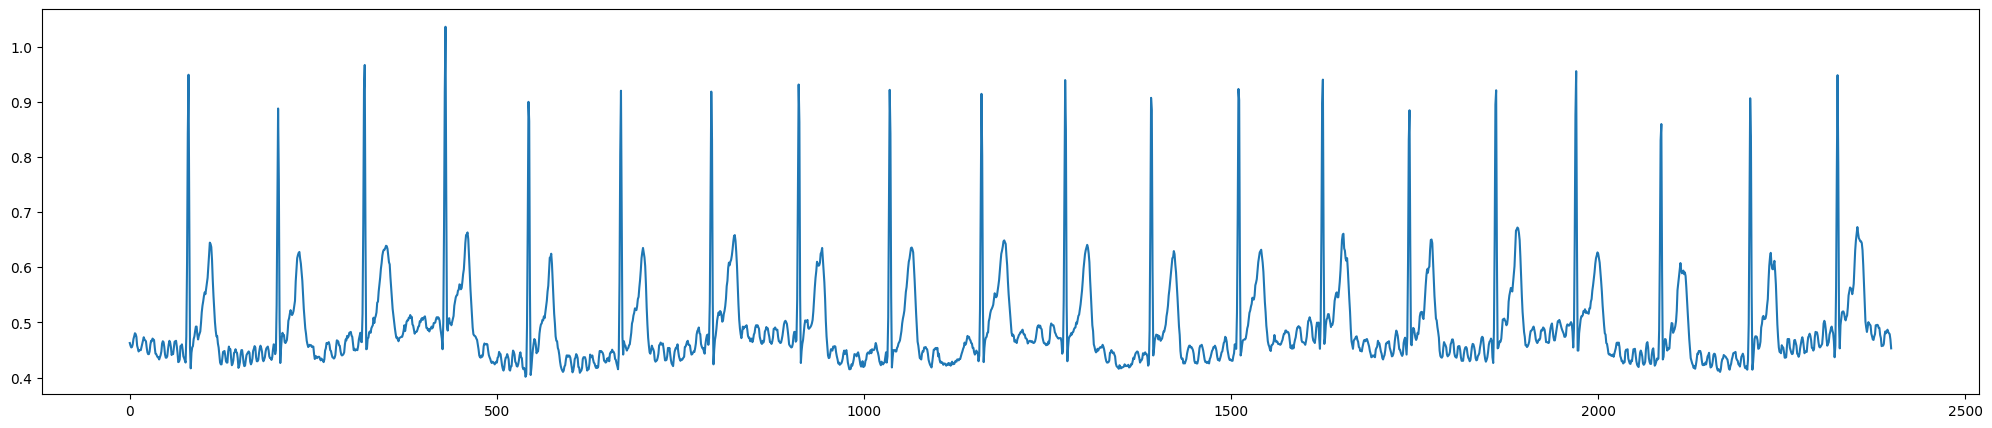

In [181]:
plt.figure(figsize = (25,5))
plt.plot(sinyal[100:2500])

In [182]:
w2fb1 = np.zeros(ndata)
w2fb2 = np.zeros(ndata)
w2fb3 = np.zeros(ndata)
gradien1 = np.zeros(ndata)
gradien2 = np.zeros(ndata)
gradien3 = np.zeros(ndata)

In [183]:
qj1 = [-2.0, 2.0]
qj2 = [-0.25, -0.75, -0.5, 0.5, 0.75, 0.25]
qj3 = [-0.03125, -0.09375, -0.1875, -0.3125, -0.34375, -0.28125, -0.125, 0.125, 0.28125, 0.34375, 0.3125, 0.1875, 0.09375, 0.03125]

In [184]:
for i in range(ndata):
    w2fb1[i] = qj1[0] * sinyal[i] +  qj1[1] * sinyal[i-1];
    w2fb2[i] = qj2[0] * sinyal[i] +  qj2[1] * sinyal[i-1] +  qj2[2] * sinyal[i-2] +  qj2[3] * sinyal[i-3] +  qj2[4] * sinyal[i-4] +  qj2[5] * sinyal[i-5];
    w2fb3[i] = qj3[0] * sinyal[i] +  qj3[1] * sinyal[i-1] +  qj3[2] * sinyal[i-2] +  qj3[3] * sinyal[i-3] +  qj3[4] * sinyal[i-4] +  qj3[5] * sinyal[i-5] +  qj3[6] * sinyal[i-6] +  qj3[7] * sinyal[i-7] +  qj3[8] * sinyal[i-8] +  qj3[9] * sinyal[i-9] +  qj3[10] * sinyal[i-10] +  qj3[11] * sinyal[i-11] +  qj3[12] * sinyal[i-12] +  qj3[13] * sinyal[i-13];

In [185]:
for i in range(ndata):
    gradien1[i] = w2fb1[i] - w2fb1[i-1]
    gradien2[i] = w2fb2[i] - w2fb2[i-2]
    gradien3[i] = w2fb3[i] - w2fb3[i-3]

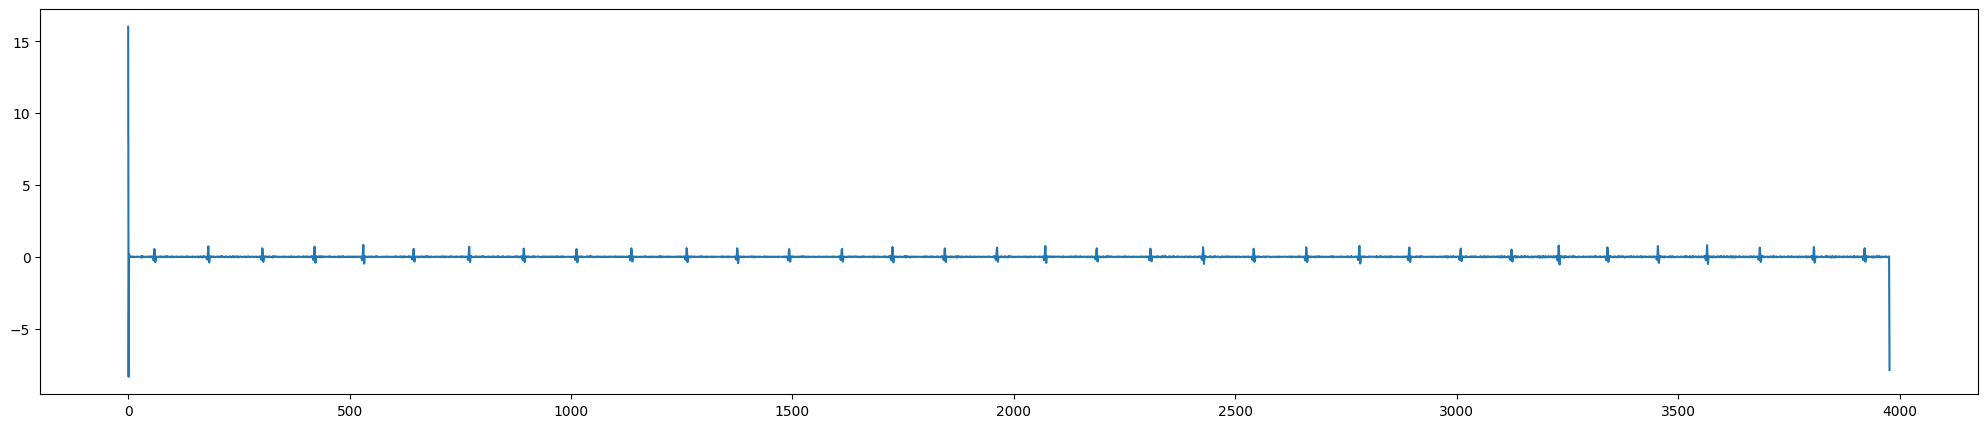

In [186]:
plt.figure(figsize = (25,5))
plt.plot(gradien1)

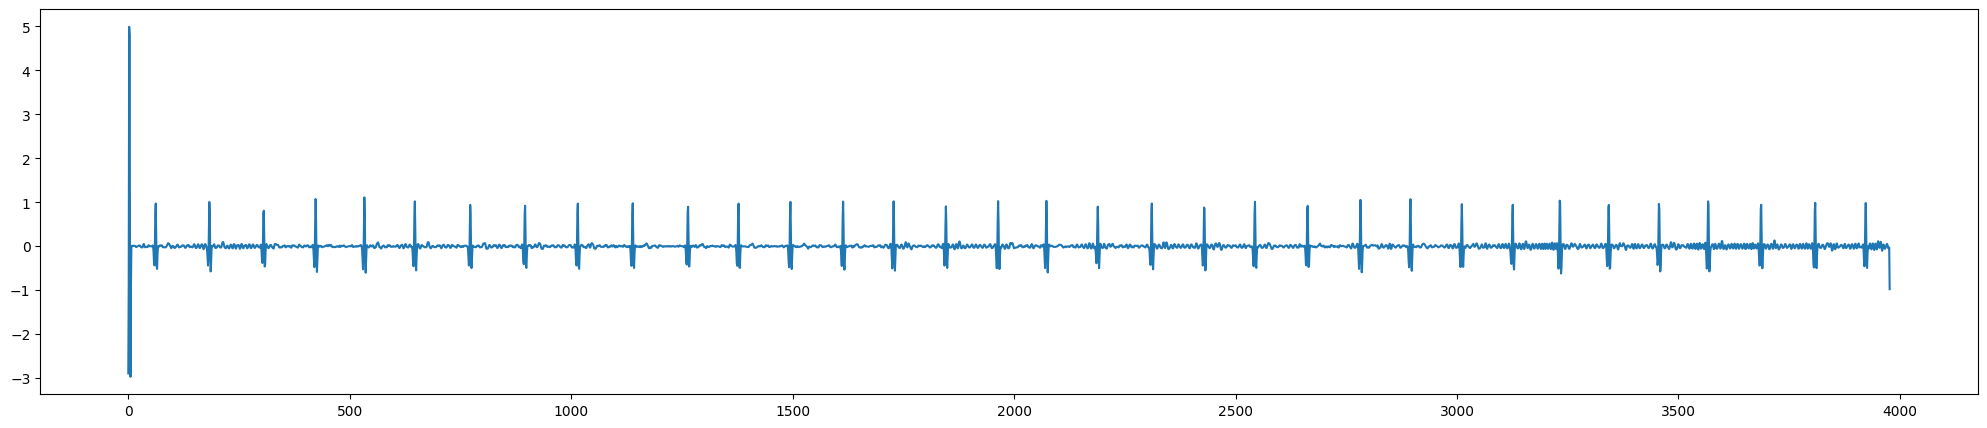

In [187]:
plt.figure(figsize = (25,5))
plt.plot(gradien2)

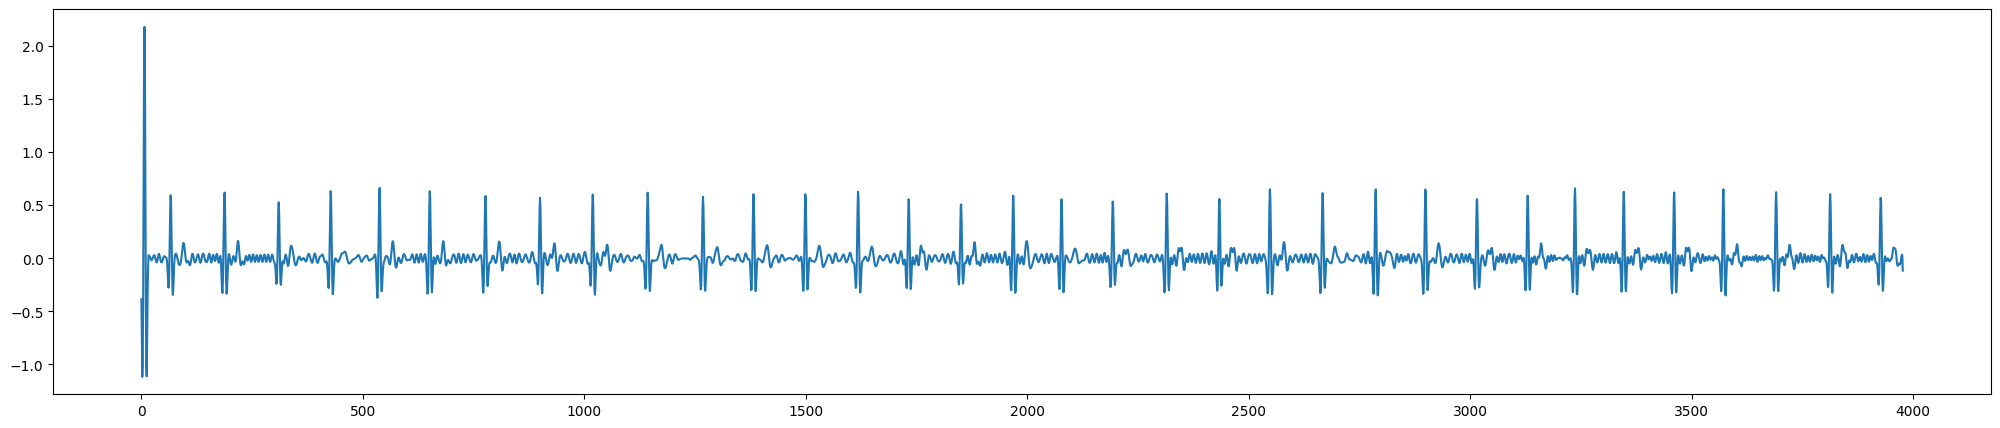

In [188]:
plt.figure(figsize = (25,5))
plt.plot(gradien3)

In [189]:
hasil_QRS = np.zeros(ndata)

In [190]:
for i in range(ndata):
    if (gradien1[i] > -1 and gradien2[i] > -3 and gradien3[i] > 0.4):
        hasil_QRS[i] = 1
    else:
        hasil_QRS[i] = 0

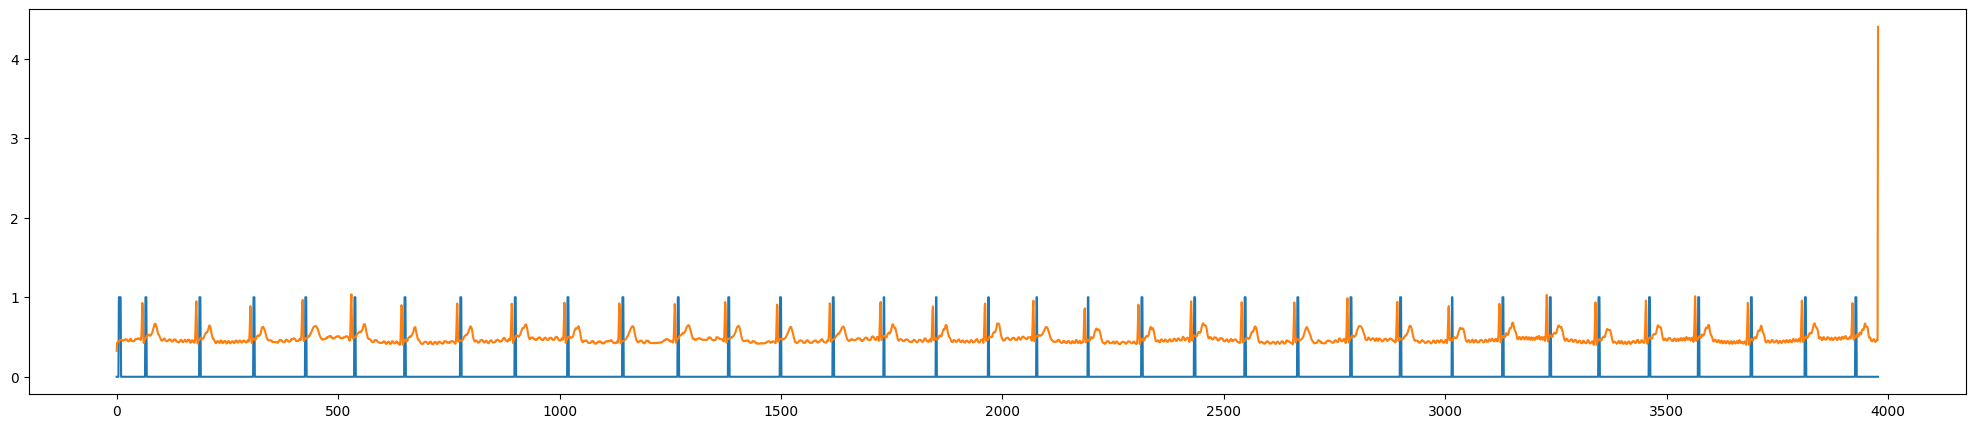

In [191]:
plt.figure(figsize = (25,5))
plt.plot(hasil_QRS)
plt.plot(sinyal)

In [192]:
k = []
for n in range(ndata-1):
    if hasil_QRS[n] == 0 and hasil_QRS[n+1] == 1:
        k.append(n)

rrinterval = np.zeros(len(k))
bpm = np.zeros(len(k))
for i in range(1, len(k)-1):
    rrinterval[i] = ((k[i]/fs)-(k[i-1]/fs))
    bpm[i] = 60/rrinterval[i]
bpm

array([  0.        , 125.        ,  61.47540984,  61.47540984,
        64.1025641 ,  67.56756757,  66.37168142,  59.52380952,
        60.97560976,  63.02521008,  60.48387097,  60.        ,
        65.78947368,  64.1025641 ,  63.02521008,  65.2173913 ,
        63.55932203,  63.55932203,  68.80733945,  64.65517241,
        61.98347107,  63.02521008,  65.78947368,  63.02521008,
        62.5       ,  66.96428571,  64.1025641 ,  65.78947368,
        70.09345794,  68.18181818,  65.78947368,  67.56756757,
        63.02521008,  61.47540984,   0.        ])

In [193]:
RR = len(rrinterval)
RR_RMSSD=0
for n in range (2, RR-1):
    RR_RMSSD += ((rrinterval[n]-rrinterval[n-1])**2)

result_rmmsd = np.sqrt(RR_RMSSD/(RR-1))
result_rmmsd

0.09457769914980303

In [194]:
mean_bpm = np.mean(bpm)
mean_bpm

62.229415826328584

## pvRSA

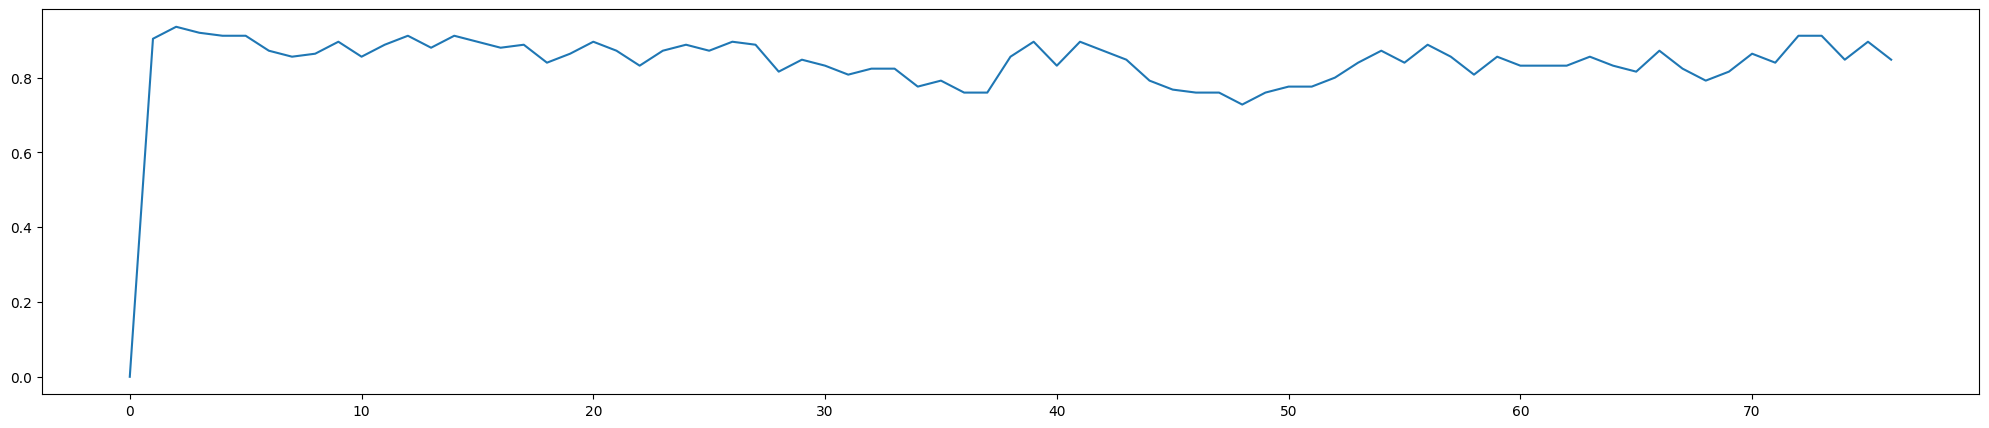

In [176]:
rrinterval
plt.figure(figsize = (25,5))
plt.plot(rrinterval[:-1])

In [177]:
rrinterval

array([0.   , 0.904, 0.936, 0.92 , 0.912, 0.912, 0.872, 0.856, 0.864,
       0.896, 0.856, 0.888, 0.912, 0.88 , 0.912, 0.896, 0.88 , 0.888,
       0.84 , 0.864, 0.896, 0.872, 0.832, 0.872, 0.888, 0.872, 0.896,
       0.888, 0.816, 0.848, 0.832, 0.808, 0.824, 0.824, 0.776, 0.792,
       0.76 , 0.76 , 0.856, 0.896, 0.832, 0.896, 0.872, 0.848, 0.792,
       0.768, 0.76 , 0.76 , 0.728, 0.76 , 0.776, 0.776, 0.8  , 0.84 ,
       0.872, 0.84 , 0.888, 0.856, 0.808, 0.856, 0.832, 0.832, 0.832,
       0.856, 0.832, 0.816, 0.872, 0.824, 0.792, 0.816, 0.864, 0.84 ,
       0.912, 0.912, 0.848, 0.896, 0.848, 0.   ])

In [ ]:
plt.figure(figsize = (25,5))
plt.plot(bpm[:-1])

In [ ]:
RR_RSA = np.zeros(RR)
rrmin = np.zeros(RR)
for n in range (1, RR):
    RR_RSA[n] = (rrinterval[n]-rrinterval[n-1])
    if RR_RSA[n] < 0 :
        rrmin[n] = rrinterval[n]
rrmin

In [ ]:
rrmin_fix = rrmin[rrmin != 0]
mean_rrmin = np.mean(rrmin_fix)
mean_rrmin cx
# rrmin_fix

In [ ]:
rrmax = np.zeros(RR)
for n in range (len(k)-1):
    RR_RSA[n] = (rrinterval[n]-rrinterval[n-1])
    if RR_RSA[n] > 0 :
        rrmax[n] = rrinterval[n]
rrmax

In [ ]:
rrmax_fix = rrmax[rrmax != 0]
mean_rrmax = np.mean(rrmax_fix)
mean_rrmax

In [ ]:
pvrsa = mean_rrmax - mean_rrmin
pvrsa

## pvRSA 2

In [ ]:
rrmin1 = np.zeros(len(k))
for n in range (len(k)-1):
    if rrinterval[n] < 0.99 :
        rrmin1[n] = rrinterval[n]
rrmin1

In [ ]:
rrmin_fix = rrmin1[rrmin1 != 0]
mean_rrmin1 = np.mean(rrmin_fix)
mean_rrmin1

In [ ]:
rrmax1 = np.zeros(RR)
for n in range (1, RR):
    if rrinterval[n] > 0.99 :
        rrmax1[n] = rrinterval[n]
rrmax1

In [ ]:
rrmax_fix = rrmax1[rrmax1 != 0]
mean_rrmax1 = np.mean(rrmax_fix)
mean_rrmax1

In [ ]:
pvrsa1 = mean_rrmax1 - mean_rrmin1
pvrsa1